In [47]:
import tensorflow
from sklearn.preprocessing import LabelEncoder
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from keras.utils import pad_sequences


In [6]:
data = pd.read_csv('train.csv')
questions = data['problem'].tolist()
categories = data['category'].tolist()

In [7]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)

In [8]:
max_sequence_length = max([len(seq) for seq in sequences])
padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded_sequences, categories, test_size=0.2, random_state=42)



In [10]:
num_categories = len(set(categories))
y_train_encoded = to_categorical(y_train, num_classes=num_categories)

In [29]:
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_categories, activation='softmax'))

In [35]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train_encoded, epochs=150, batch_size=32)

Epoch 1/150
7/7 [==============================] - 6s 135ms/step - loss: 2.0894 - accuracy: 0.3000
Epoch 2/150
7/7 [==============================] - 1s 140ms/step - loss: 1.8542 - accuracy: 0.4150
Epoch 3/150
7/7 [==============================] - 1s 133ms/step - loss: 1.7431 - accuracy: 0.4100
Epoch 4/150
7/7 [==============================] - 1s 131ms/step - loss: 1.6283 - accuracy: 0.4800
Epoch 5/150
7/7 [==============================] - 1s 127ms/step - loss: 1.5649 - accuracy: 0.4250
Epoch 6/150
7/7 [==============================] - 1s 140ms/step - loss: 1.4583 - accuracy: 0.5500
Epoch 7/150
7/7 [==============================] - 1s 132ms/step - loss: 1.3539 - accuracy: 0.5350
Epoch 8/150
7/7 [==============================] - 1s 155ms/step - loss: 1.3122 - accuracy: 0.5100
Epoch 9/150
7/7 [==============================] - 1s 144ms/step - loss: 1.2060 - accuracy: 0.5950
Epoch 10/150
7/7 [==============================] - 1s 169ms/step - loss: 1.1075 - accuracy: 0.6450
Epoch 11/

In [36]:
#test_data = pd.read_csv('test.csv')
#test_questions = test_data['problem'].tolist()
#test_sequences = tokenizer.texts_to_sequences(test_questions)
#test_padded_sequences = pad_sequences(test_sequences, maxlen=max_sequence_length)
#predictions = np.argmax(model.predict(test_padded_sequences), axis=-1)

In [37]:
predictions = np.argmax(model.predict(X_test), axis=-1)

2/2 [==============================] - 1s 38ms/step


In [38]:
#label_encoder = LabelEncoder()
#label_encoder.fit(categories)

#predicted_categories = label_encoder.inverse_transform(predictions)

#y_test_encoded = label_encoder.transform(y_test)

In [39]:
for question, category in zip(X_test, predictions):
    print(f"Question: {tokenizer.sequences_to_texts([question])[0]}\nCategory: {category}\n")


Question: determine the number of solutions for the following system of equations y 7x 4 y 1 3x 3 number of solutions no solution exactly one solution infinitely many solutions
Category: 11

Question: olivia went to a beauty store to buy p bottles of nail polish each bottle of nail polish costs 9 50 how much will she spend in total for the bottles of nail polish write an expression using p and 9 50
Category: 9

Question: solve the following system by substitution y 6 x y 3x
Category: 14

Question: write an equation to match the phrase 11 greater than n is 33
Category: 4

Question: solve the following system by elimination 6x 3y 15 4x 3y 13
Category: 14

Question: daisy bought 15 new plants for her garden she paid the full price of 4 75 for some of the plants some of the plants were on sale for 3 50 each all together daisy spent 60 write a system of equations to find the number of full priced plants daisy bought x and the number of sale priced plants daisy bought y
Category: 19

Questio

In [40]:
#accuracy = accuracy_score(y_test_encoded, predictions)
#print("Accuracy:", accuracy)

In [41]:
for question, category in zip(X_test, predictions):
    print(f"Question: {tokenizer.sequences_to_texts([question])[0]}\nCategory: {category}\n")


Question: determine the number of solutions for the following system of equations y 7x 4 y 1 3x 3 number of solutions no solution exactly one solution infinitely many solutions
Category: 11

Question: olivia went to a beauty store to buy p bottles of nail polish each bottle of nail polish costs 9 50 how much will she spend in total for the bottles of nail polish write an expression using p and 9 50
Category: 9

Question: solve the following system by substitution y 6 x y 3x
Category: 14

Question: write an equation to match the phrase 11 greater than n is 33
Category: 4

Question: solve the following system by elimination 6x 3y 15 4x 3y 13
Category: 14

Question: daisy bought 15 new plants for her garden she paid the full price of 4 75 for some of the plants some of the plants were on sale for 3 50 each all together daisy spent 60 write a system of equations to find the number of full priced plants daisy bought x and the number of sale priced plants daisy bought y
Category: 19

Questio

In [42]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.74


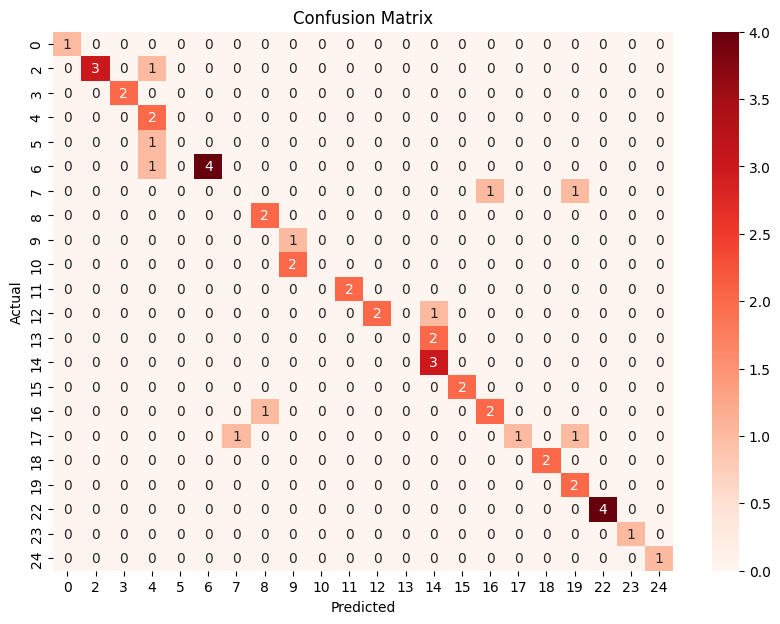

In [50]:
cm = confusion_matrix(y_test, predictions)
class_names = np.unique(y_test)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
plt.figure(figsize=(10, 7))
sns.heatmap(df_cm, annot=True, fmt='d', cmap='Reds')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [69]:
#submission_df = pd.DataFrame({'Problem': test_questions, 'Category': predictions_padded})

In [70]:
#submission_df.to_csv('submission.csv', index=False)